# Data Mining Cup - Email Spam Filter

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import model_selection, naive_bayes, metrics, svm
#from IPython.display import Image 
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Trainingsdaten - Analyse

Als erstes sollte der Trainingsdatensatz eingelesen werden und anschließend die ersten Zeilen ausgegeben werden.

Aufgabe:

1. Datei SMSSpamTrain.csv einlesen und ausgeben. Tipp: Achtet auf die Seperierung der Daten durch ein Semikolon ( ; ).

## Daten einlesen



In [3]:
df = pd.read_csv("SMSSpamTrain_final.csv", delimiter=";")

### Daten ausgeben

In [4]:
df

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
2782,ham,Then its most likely called Mittelschmertz. Go...
2783,ham,Well at this right I'm gonna have to get up an...
2784,ham,"Just arrived, see you in a couple days &lt;3"
2785,ham,"K, wat s tht incident?"


Da wir jetzt einen ersten Eindruck haben, wie der Datensatz aussieht, können wir durch geeignete Visualisierung weitere Informationen über den Datensatz gewinnen. Eine sinnvolle Information
wäre es, herauszufinden, wie viele "ham" oder "spam" Mails in dem Datensatz vorhanden sind. Spam ist Spam, Ham ist Nicht-Spam.


In Frage kommt hierfür z.B. die Methode df.plot(), mit der es möglich ist, durch den Parameter kind = {'bar' , 'hist' , 'box' , 'pie' , 'scatter'} die Art auszuwählen in der die Informationen dargestellt werden.


In der unteren Zelle wurde zur Vereinfachung bereits mit pd.value_counts() die Anzahl der unterschiedlichen Werte der Spalte "Label" in der Variable "anzahl_werte" gespeichert und mit 
sort = True sortiert. 

Aufgabe:

1. Probiert verschiedene Formen der Visualisierung aus.


In [5]:
anzahl_werte=pd.value_counts(df["Label"], sort= True)


Interessant wäre es im Kontext eines Spam Filters, sich die Frequenz, also die Häufigkeit des Vorkommens von bestimmten Wörtern in Nicht-Spam und Spam anzeigen zu lassen. Dafür eignet sich die Klasse "Counter", die wir am Anfang importieren und in Kombination mit einem "join" zwischen "ham" oder "spam" und "SMS" die Top-20 Wörter ermittelt werden.

Ein Beispiel, wie man das in Python umsetzen könnte und in einem bar.plot darstellen kann, haben wir unten bereitgestellt.

In [6]:
count1 = Counter(" ".join(df[df['Label']=='ham']["SMS"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "Wörter in nicht-Spam", 1 : "count"})
count2 = Counter(" ".join(df[df['Label']=='spam']["SMS"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "Wörter in Spam", 1 : "count_"})

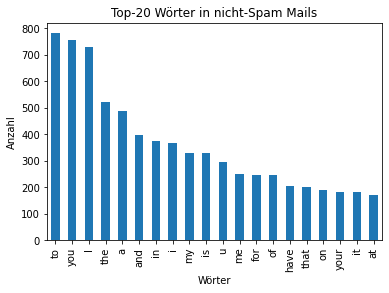

In [7]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["Wörter in nicht-Spam"]))
plt.xticks(y_pos, df1["Wörter in nicht-Spam"])
plt.title('Top-20 Wörter in nicht-Spam Mails')
plt.xlabel('Wörter')
plt.ylabel('Anzahl')
plt.show()

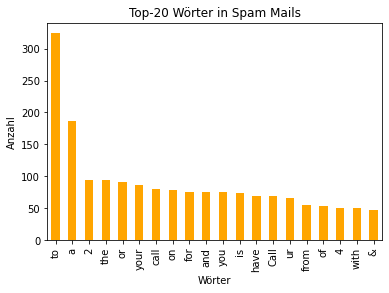

In [8]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["Wörter in Spam"]))
plt.xticks(y_pos, df2["Wörter in Spam"])
plt.title('Top-20 Wörter in Spam Mails')
plt.xlabel('Wörter')
plt.ylabel('Anzahl')
plt.show()

## Datenvorverarbeitung

Bevor wir uns der Datentransformation widmen, ist es notwendig den Datensatz zunächst von der Groß- und Kleinschreibung und von der Punktuation zu bereinigen.

Aufgabe:

1. Daten bereinigen



## Datentransformation

Da die zwei Modelle Support Vector Machine und Naive Bayes beide numerische Werte voraussetzen, ist eine Transformation der Werte des Datensatzes notwendig. Eine Möglichkeit ist dafür ein
"Vokabular" zu erstellen, der die einzelnen Wörter, die in der Spalte "SMS" vorkommen, beinhaltet. Anschließend wird mit Hilfe einer doppelten for-Schleife, das Vorkommen aller einzigartiger Wörter pro Index (also Zeile) ermittelt und in die Variable "wort_anzahl_pro_sms" gespeichert. Diese Variable muss dann, mit dem geeigneten Befehl, in ein DataFrame umgewandelt werden.

Als erstes sollt Ihr selbstständig, durch zuhilfenahme nahme des Beispiels aus der Präsentation, das Vokabular erstellen. Der Code für den zweiten Teil der Transformation, wird von uns vorgegeben. Allerdings ist eure Aufgabe, durch Kommentare zu erklären, wöfür die einzelnen Bestandteile da sind und was sie bewirken. Zum Schluss sollt ihr das Data Frame erstellen und ausgeben.

Aufgaben:

1. Vokabular erstellen.
2. for-Schleife kommentieren.
3. Data Frame erstellen.

### Vokabular

In der Initialisierung der Variable "wort_anzahl_pro_sms", wird die Länge, in Abhängigkeit der Länge des DataFrame, festgelegt. Dabei wird für jedes einzigartige Wort in vokabular eine Liste generiert die mit [0] gefüllt wird. Die Anzahl der [0] wird durch [0] * len(df['SMS']) definiert (in diesem Fall die Länge des DataFrame).

Beispiel: [0]*5 = [0,0,0,0,0]

### for-Schleife

In [71]:
wort_anzahl_pro_sms = {unique_word: [0] * len(df['SMS']) for unique_word in vokabular}

for index, sms in enumerate(df['SMS']):
   for word in sms:
      wort_anzahl_pro_sms[word][index] += 1

### DataFrame erstellen

Jetzt wo wir das Vorkommen der einzelnen Wörter in einem Data Frame umgewandelt haben, ist der nächste Schritt, diese mit den Trainingsdaten zusammenzuführen. Überlegt euch welche Daten dafür benötigt werden.

4. Trainingsdaten zusammenführen.

Zum Schluss ist es wichtig, wie oben bereits beschrieben, das alle Werte numerisch sind. Um das umzusetzen könnt Ihr wie wir das bereits aus den Übungen kennen, die Werte umwandeln.

In diesem Fall ist es auch möglich, es später bei der Aufteilung der Trainingsdaten zu tun.

# Modeltraining & Bewertung

In diesem Abschnitt sollen als erstes die Trainingsdaten für das Modeltraining in Test- und Trainingsdaten aufgeteilt werden. Das genaue Vorgehen kennt Ihr bereits aus den Übungen. Schaut euch an, inwieweit sich die Ergebnisse verändern, wenn ihr die Parameter verändert.

Aufgabe:
1. Aufteilung der Trainingsdaten

In [ ]:
from sklearn.model_selection import train_test_split

Weiter geht es mit dem Training der Modelle.

Wir haben euch unten bereits einige Zeilen Code vorgegeben, in denen die Ergebnisse gespeichert und dann in einem Data Frame und einer Confusion Matrix ausgegeben werden. Initialisiert die Modelle (wählt dabei die Parameter aus) und übergebt dem Modell die Daten mit der Methode fit(). Probiert auch hier verschiedene Parameter aus und schaut welche Auswirkungen auftreten!

Aufgabe:

2. Die Modelle trainieren

## SVM

In [42]:
   
score_train = svc.score(x_train, y_train)
score_test = svc.score(x_test, y_test)
recall_test = metrics.recall_score(y_test, svc.predict(x_test))
precision_test = metrics.precision_score(y_test, svc.predict(x_test))


In [ ]:
matrix = np.matrix([score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head()

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(x_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

## Naive Bayes (MNB)

In [46]:

score_train = bayes.score(x_train, y_train)
score_test = bayes.score(x_test, y_test)
recall_test = metrics.recall_score(y_test, bayes.predict(x_test))
precision_test = metrics.precision_score(y_test, bayes.predict(x_test))


In [ ]:
matrix = np.matrix([score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head()

In [ ]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(x_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

# Testdaten - Modelanwendung & Genauigkeit

Bevor wir die Genauigkeit der Modelle testen, müssen die Testdaten zu erst eingelesen und dann wie die Trainingsdaten transformiert werden. Der Code für die Transformation der Testdaten, wird diesmal vorgegeben. Achtet darauf den Code anzupassen!

Aufgaben:

1. Testdaten einlesen
2. Transformation anpassen


## Testdaten einlesen

## Testdaten transformieren

In [ ]:

df['SMS'] = df['SMS'].str.replace(
   '\W', ' ') # Entfernt Punktuation
df['SMS'] = df['SMS'].str.lower() # Entfernt Groß- und Kleinschreibung
df.head(3)

In [52]:
df['SMS'] = df['SMS'].str.split()

vokabular = []
for sms in df['SMS']:
   for word in sms:
      vokabular.append(word)

vokabular = list(set(vokabular))

In [53]:
wort_anzahl_pro_sms = {unique_word: [0] * len(df['SMS']) for unique_word in vokabular}

for index, sms in enumerate(df['SMS']):
   for word in sms:
      wort_anzahl_pro_sms[word][index] += 1

In [54]:
train_trans = pd.DataFrame(wort_anzahl_pro_sms)
train_trans.head()

## Model auf die Testdaten anwenden

Im letzten Teil der Schulung, werden die Modelle oder eines der Modelle benutzt um vorherzusagen, ob die Mails in dem Testdatensatz Spam oder Nicht-Spam sind. Das Ergebniss sollte in einem Data Frame gespeichert werden. Gebt diesen aus und betrachtet, wie die Daten aussehen. Um das Ergebniss zu überprüfen, werden die Trainingsdaten als Vergleich genutzt. Überlegt euch wie ihr die beiden vergleichen und damit die Genauigkeit ermitteln könnt. 

Aufgaben:

1. Modell zur Vorhersage nutzen.
2. Vorhersage mit der Lösung vergleichen.
3. Ergebnisse visualisieren.

In [57]:

Test = pd.DataFrame(data = prediction, columns = ['Spam'])
Test1 = pd.DataFrame(data = prediction1, columns = ['Spam'])

In [ ]:
dfLösung = pd.read_csv("SMSSpamTrain.csv", sep = ';')

In [ ]:
count_Class=pd.value_counts(ergebnisse['Richtig'], sort= True)
count_Class.plot(kind = 'pie',  autopct='%0.1f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

In [ ]:
count_Class=pd.value_counts(ergebnisse1['Richtig'], sort= True)
count_Class.plot(kind = 'pie',  autopct='%0.1f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()